In [3]:

import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [4]:

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:

X_train.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:

single_image= X_train[0]

In [8]:
single_image.shape


(28, 28)

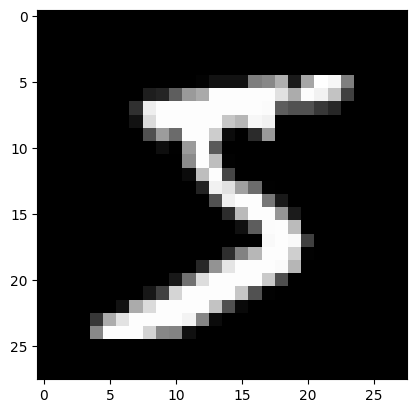

In [9]:

plt.imshow(single_image,cmap='gray')

In [10]:
X_train.min()

0

In [11]:

X_train.max()

255

In [12]:

X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:

X_train_scaled.min()


0.0

In [14]:

X_train_scaled.max()

1.0

In [15]:

y_train[0]

5

In [16]:

y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:

type(y_train_onehot)


numpy.ndarray

In [18]:

y_train_onehot.shape


(60000, 10)

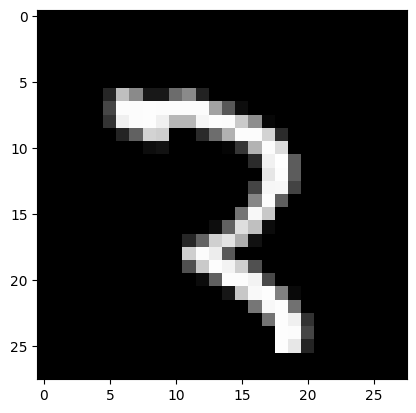

In [19]:

single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(28, 28, 1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [23]:
print("Abishek Xavier A 212222230004")
model.summary()

Abishek Xavier A 212222230004
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 64)                346176    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0

In [24]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
print("Abishek Xavier A 212222230004")
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))


Abishek Xavier A 212222230004
Epoch 1/5
938/938 [==============================] - 36s 37ms/step - loss: 0.1909 - accuracy: 0.9447 - val_loss: 0.0682 - val_accuracy: 0.9784
Epoch 2/5
938/938 [==============================] - 31s 33ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.0534 - val_accuracy: 0.9810
Epoch 3/5
938/938 [==============================] - 33s 35ms/step - loss: 0.0458 - accuracy: 0.9860 - val_loss: 0.0482 - val_accuracy: 0.9839
Epoch 4/5
938/938 [==============================] - 63s 67ms/step - loss: 0.0340 - accuracy: 0.9895 - val_loss: 0.0505 - val_accuracy: 0.9827
Epoch 5/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0258 - accuracy: 0.9921 - val_loss: 0.0457 - val_accuracy: 0.9858


In [29]:
metrics = pd.DataFrame(model.history.history)

In [30]:
print("Abishek Xavier A 212222230004")
metrics.head()

Abishek Xavier A 212222230004


,loss,accuracy,val_loss,val_accuracy
0,0.190945,0.944683,0.068176,0.9784
1,0.066222,0.980333,0.053355,0.9810
2,0.045759,0.986000,0.048169,0.9839
3,0.033978,0.989483,0.050486,0.9827
4,0.025777,0.992100,0.045742,0.9858


Abishek Xavier A 212222230004


<Axes: >

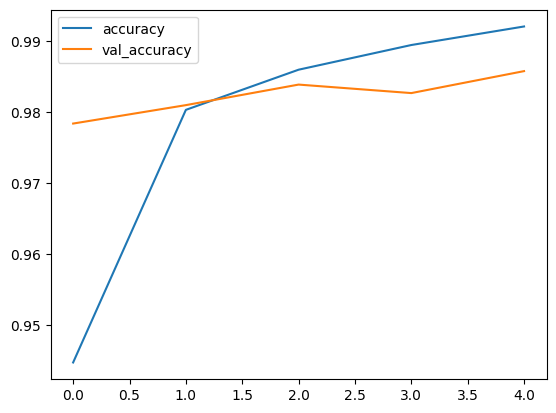

In [31]:
print("Abishek Xavier A 212222230004")
metrics[['accuracy','val_accuracy']].plot()


Abishek Xavier A 212222230004


<Axes: >

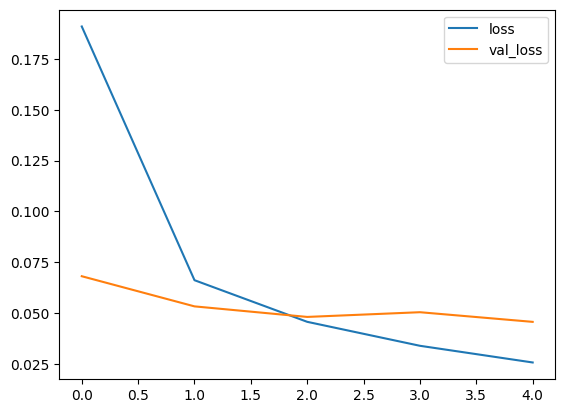

In [32]:
print("Abishek Xavier A 212222230004")
metrics[['loss','val_loss']].plot()

In [33]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 6ms/step


In [34]:
print("Abishek Xavier A 212222230004")
print(confusion_matrix(y_test,x_test_predictions))

Abishek Xavier A 212222230004
[[ 977    1    0    0    0    0    1    1    0    0]
 [   0 1131    2    0    0    0    1    1    0    0]
 [   4    5 1006    1    1    0    0    8    6    1]
 [   0    0    0  999    0    2    0    5    3    1]
 [   0    0    0    0  974    0    2    0    0    6]
 [   2    0    1    9    0  876    2    0    0    2]
 [   7    3    0    1    1    4  939    0    3    0]
 [   0    2    6    0    0    0    0 1019    1    0]
 [   6    0    2    1    1    3    1    4  952    4]
 [   4    2    0    4    3    0    0   10    1  985]]


In [35]:
print("Abishek Xavier A 212222230004")
print(classification_report(y_test,x_test_predictions))


Abishek Xavier A 212222230004
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:

img = image.load_img('/content/imagefive.png')


In [37]:
print("Abishek Xavier A 212222230004")
type(img)


Abishek Xavier A 212222230004


PIL.Image.Image

In [40]:

img = image.load_img('imagefive.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [41]:

x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [42]:
print("Abishek Xavier A 212222230004")
print(x_single_prediction)

Abishek Xavier A 212222230004
[5]


Abishek Xavier A 212222230004


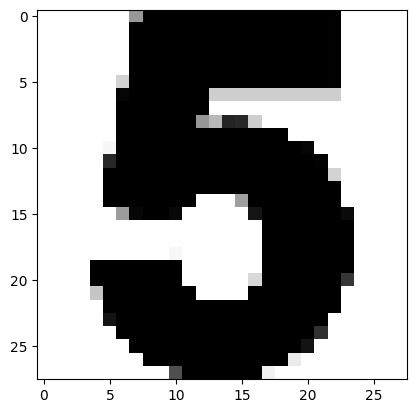

In [43]:
print("Abishek Xavier A 212222230004")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')


In [45]:

img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [46]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 74ms/step


In [47]:
print("Abishek Xavier A 212222230004")
print(x_single_prediction)

Abishek Xavier A 212222230004
[5]
